# Experiment: Examples of the recursive construction of solutions with optimal geometry for a given tree topology

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import sys

sys.path.append('../src/')

%load_ext autoreload
%autoreload 2


from iterative_geometry_solver import iterative_geometry_solver
from tree_growing_heuristic import tree_growing_heuristic
from geometric_construction_solver import geometric_bot_solver
from com_heuristic import left_child_halfplane_decider

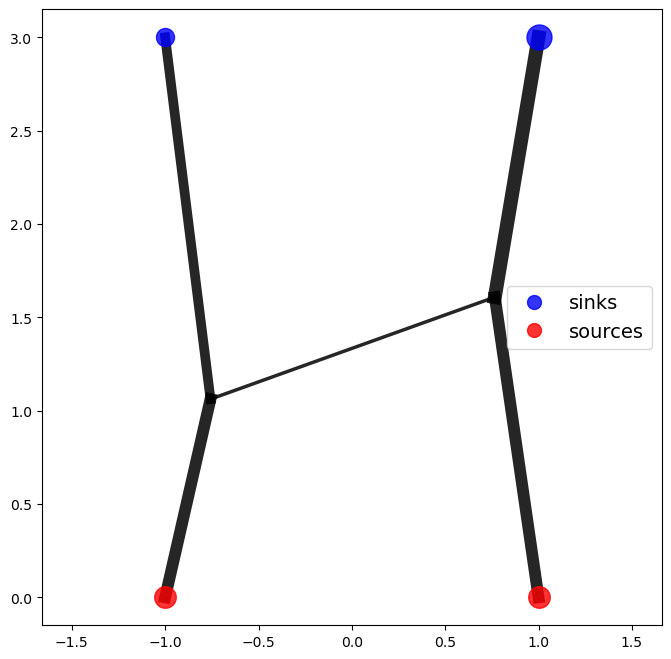

In [2]:
#next example 2 -> 2 branching:
#input:
children_dict = {
    -2:[3],
    1:[-2],
    -1:[2,-2],
    0:[-1]
}

list_source_idx = [0,1]
list_sink_idx = [2,3]

supply_arr = np.array([0.5,0.5])
demand_arr = np.array([0.4, 0.6])

#positions:
coords_sources = np.array([
    [-1.,0.],
    [1,0.]
])

coords_sinks = np.array([
    [-1.,3.],
    [1.,3.]  
])

#alpha parameter:
al = 0.65
cost, coords_iter = iterative_geometry_solver(children_dict, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                    relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                    plot=True, title="", fov=None, save=False, save_name="img")

topo = nx.Graph()
for parent in children_dict:
    for child in children_dict[parent]:
        topo.add_edge(parent, child)

iter_left_child_dict = left_child_halfplane_decider(topo, coords_iter)

({-1: <geometric_construction_solver.branching_point_class at 0x7f4dbb980190>,
  -2: <geometric_construction_solver.branching_point_class at 0x7f4dbb980fa0>},
 4.181333829085444)

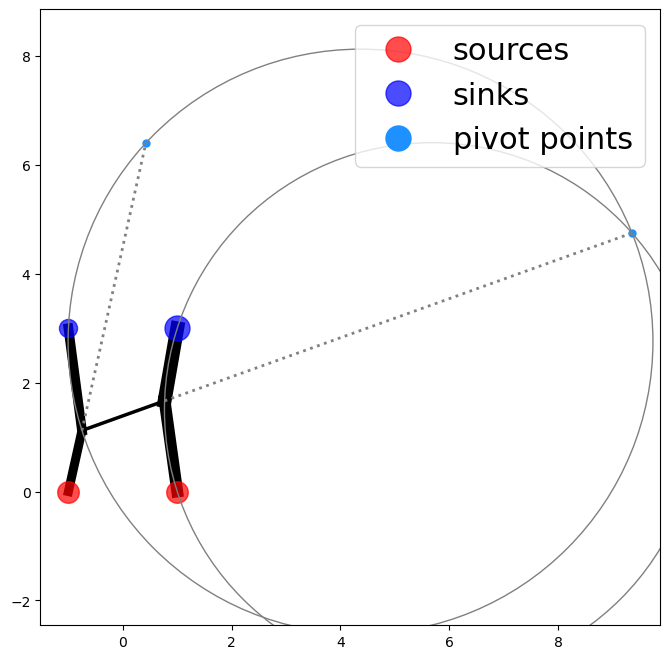

In [4]:
geometric_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                iter_left_child_dict,
                plot=True, title="", fov=None, save=False, save_name="img")


seed= 7


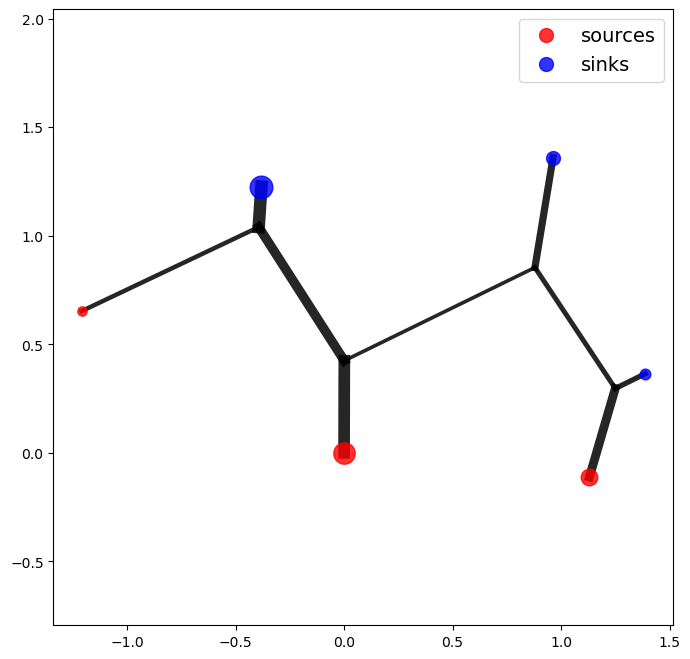

None


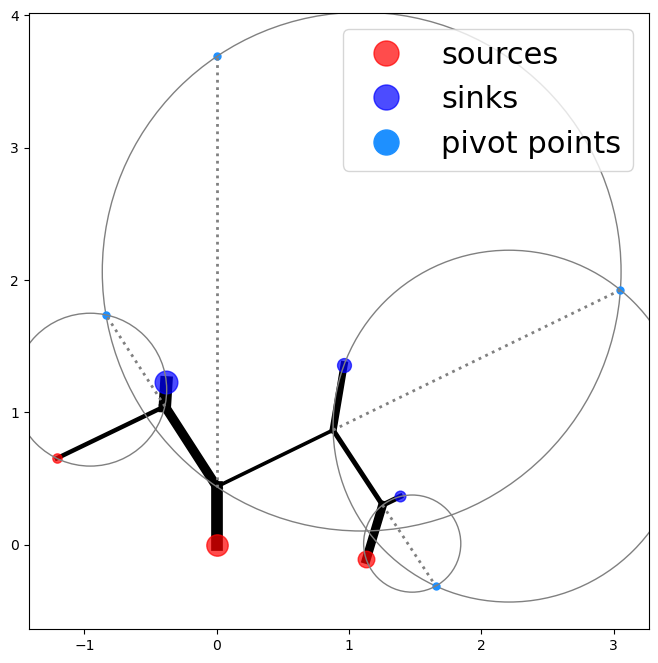

In [9]:
for seed in [7]:
    print("\nseed=", seed)
    
    np.random.seed(seed)
    
    # WLOG, use convention that we always want more sinks than sources:
    num_sinks = 3
    num_sources = 3
    al = np.random.random()
    al = 0.4

    topo, running_cost, coords_arr, bot_problem_dict = tree_growing_heuristic(num_sinks, num_sources, al, max_edge_length=1., source0_supply=100.,
                               max_source_supply_factor=1.5, num_tries=3, max_refill_counter=3,
                                N_e = 3, N_n = 3,
                               plot_final=False, plot_accepted=False, plot_alternatives=False)


    al = bot_problem_dict["al"]
    coords_sources = bot_problem_dict["coords_sources"]
    coords_sinks = bot_problem_dict["coords_sinks"]
    supply_arr = bot_problem_dict["supply_arr"]
    demand_arr = bot_problem_dict["demand_arr"]
    children_dict = dict(nx.bfs_successors(topo, 0))

    cost, coords_iter = iterative_geometry_solver(children_dict, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                                        relative_improvement_threshold=1e-6, min_iterations=-1, max_iterations=300,
                                        plot=True, title="", fov=None, save=False, save_name="img")

    topo = nx.Graph()
    for parent in children_dict:
        for child in children_dict[parent]:
            topo.add_edge(parent, child)

    iter_left_child_dict = left_child_halfplane_decider(topo, coords_iter)

    geometric_bot_solver(topo, supply_arr, demand_arr, coords_sources, coords_sinks, al,
                    iter_left_child_dict,
                    plot=True, title="", fov=None, save=True, save_name="img_jo")